In [87]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import json

In [88]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [89]:
# Text processing
import re
import string
from collections import Counter

In [90]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [91]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [92]:
# Machine Learning - Traditional Models
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier

In [93]:
# Metrics and Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc,
    roc_auc_score, precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import label_binarize

In [94]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [95]:
test_df = pd.read_json('test.jsonl', lines=True)
train_df = pd.read_json('train.jsonl', lines=True)
val_df = pd.read_json('validation.jsonl',lines=True)

In [96]:
train_df

,text,label
0,i am just so sick of feeling like this and i j...,3
1,i do know that i am not ready to feel any roma...,2
2,i would being feeling strange or nauseous so i...,4
3,i feel agitated of the time running so real slow,4
4,ive worked particularly hard with this year on...,4
...,...,...
15995,i need to make time for me and for doing thing...,2
15996,i feel this especially when i think back to si...,2
15997,i have discovered that every time i feel like ...,3
15998,i am starting to feel sorry for the muppet who...,0


In [97]:
test_df

,text,label
0,i feel enraged by the amount of people partici...,3
1,i am so ready to learn more and feel invigorat...,1
2,i but i have to say i am loving my house and w...,1
3,i feel her kicking i stop and just focus on he...,5
4,i feel proud of how he quickly picks up the co...,1
...,...,...
1995,i have more energy then the first weeks and fe...,5
1996,i feel slightly heartbroken,0
1997,i feel i can safely assume that either hes bee...,0
1998,i feel like an emotional pretzel at times twis...,0


In [98]:
val_df

,text,label
0,i am alone in feeling uncertain,4
1,i want them to have time to get different loca...,1
2,i am also feeling a little unsure of how i fee...,4
3,i remember feeling as innocent as she looked t...,1
4,i am quite done with being made to feel like a...,0
...,...,...
1995,im just gonna skip the gory details because by...,2
1996,i is distraught her eyes go so wide and glazed...,5
1997,i have spent a lot of my life feeling unhappy ...,0
1998,i remember watching and feeling a little surpr...,5


In [99]:
print(f"\nTotal Samples: {len(train_df) + len(val_df) + len(test_df)}")


Total Samples: 20000


In [100]:
# Emotion labels mapping
emotion_labels = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

In [101]:
# Add emotion names to dataframes
train_df['emotion_name'] = train_df['label'].map(emotion_labels)
val_df['emotion_name'] = val_df['label'].map(emotion_labels)
test_df['emotion_name'] = test_df['label'].map(emotion_labels)

In [102]:
print("\n DATASET INFORMATION:")
train_df.info()


 DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          16000 non-null  object
 1   label         16000 non-null  int64 
 2   emotion_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [103]:
train_df

,text,label,emotion_name
0,i am just so sick of feeling like this and i j...,3,Anger
1,i do know that i am not ready to feel any roma...,2,Love
2,i would being feeling strange or nauseous so i...,4,Fear
3,i feel agitated of the time running so real slow,4,Fear
4,ive worked particularly hard with this year on...,4,Fear
...,...,...,...
15995,i need to make time for me and for doing thing...,2,Love
15996,i feel this especially when i think back to si...,2,Love
15997,i have discovered that every time i feel like ...,3,Anger
15998,i am starting to feel sorry for the muppet who...,0,Sadness


In [104]:
print("BASIC STATISTICS:")
print(train_df.describe())

BASIC STATISTICS:
              label
count  16000.000000
mean       2.499938
std        1.707830
min        0.000000
25%        1.000000
50%        2.500000
75%        4.000000
max        5.000000


In [105]:
print("\n MISSING VALUES CHECK:")
print("-" * 40)
print(f"Training Set Missing Values:\n{train_df.isnull().sum()}")
print(f"\nValidation Set Missing Values:\n{val_df.isnull().sum()}")
print(f"\nTest Set Missing Values:\n{test_df.isnull().sum()}")


 MISSING VALUES CHECK:
----------------------------------------
Training Set Missing Values:
text            0
label           0
emotion_name    0
dtype: int64

Validation Set Missing Values:
text            0
label           0
emotion_name    0
dtype: int64

Test Set Missing Values:
text            0
label           0
emotion_name    0
dtype: int64


In [106]:
# Check for duplicates
print("DUPLICATE CHECK:")
print(f"Training Set Duplicates: {train_df.duplicated().sum()}")
print(f"Validation Set Duplicates: {val_df.duplicated().sum()}")
print(f"Test Set Duplicates: {test_df.duplicated().sum()}")

DUPLICATE CHECK:
Training Set Duplicates: 0
Validation Set Duplicates: 0
Test Set Duplicates: 0


In [107]:
# Calculate distributions
train_dist = train_df['emotion_name'].value_counts().sort_index()
val_dist = val_df['emotion_name'].value_counts().sort_index()
test_dist = test_df['emotion_name'].value_counts().sort_index()

In [108]:
print("CLASS DISTRIBUTION:")
print("Training Set:")
print(train_dist)
print(f"\nValidation Set:")
print(val_dist)
print(f"\nTest Set:")
print(test_dist)

CLASS DISTRIBUTION:
Training Set:
emotion_name
Anger       2667
Fear        2667
Joy         2666
Love        2667
Sadness     2667
Surprise    2666
Name: count, dtype: int64

Validation Set:
emotion_name
Anger       334
Fear        333
Joy         333
Love        333
Sadness     333
Surprise    334
Name: count, dtype: int64

Test Set:
emotion_name
Anger       333
Fear        334
Joy         334
Love        333
Sadness     333
Surprise    333
Name: count, dtype: int64


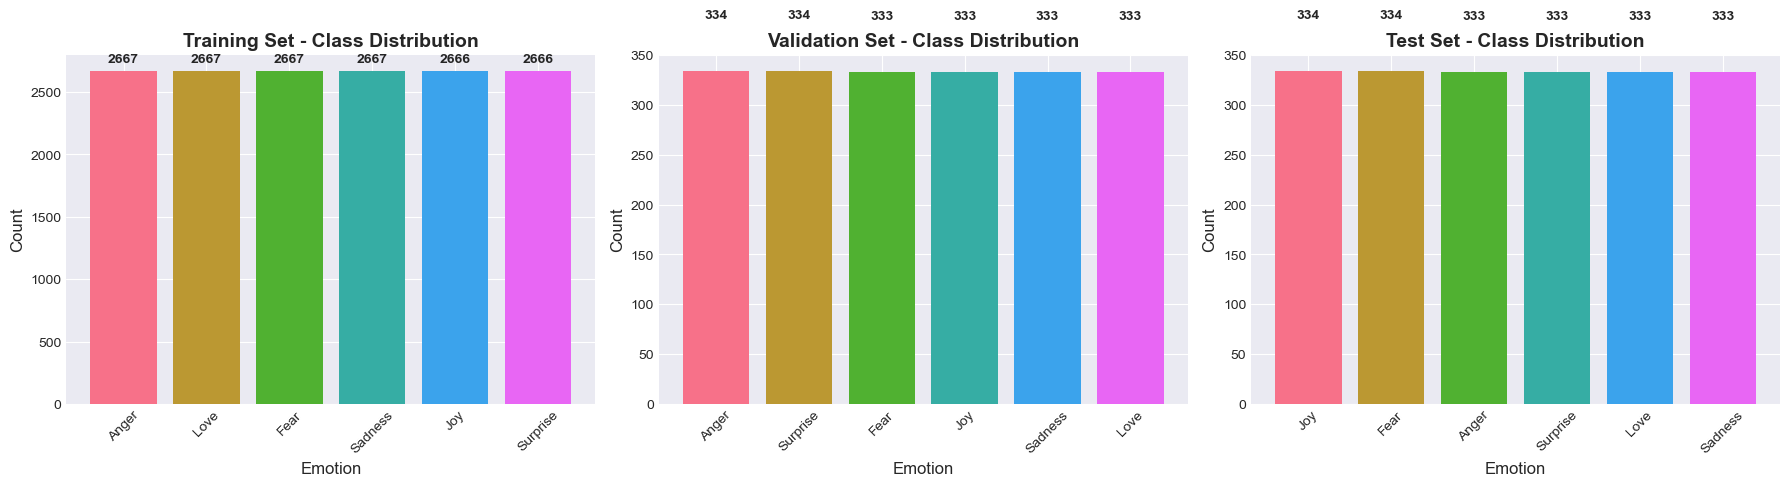

In [109]:
# Visualization 1: Class Distribution - Bar Chart
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (df, title) in enumerate([(train_df, 'Training Set'), 
                                     (val_df, 'Validation Set'), 
                                     (test_df, 'Test Set')]):
    emotion_counts = df['emotion_name'].value_counts()
    axes[idx].bar(emotion_counts.index, emotion_counts.values, 
                  color=sns.color_palette("husl", 6))
    axes[idx].set_title(f'{title} - Class Distribution', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Emotion', fontsize=12)
    axes[idx].set_ylabel('Count', fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(emotion_counts.values):
        axes[idx].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('class_distribution_bar.png', dpi=300, bbox_inches='tight')
plt.show()

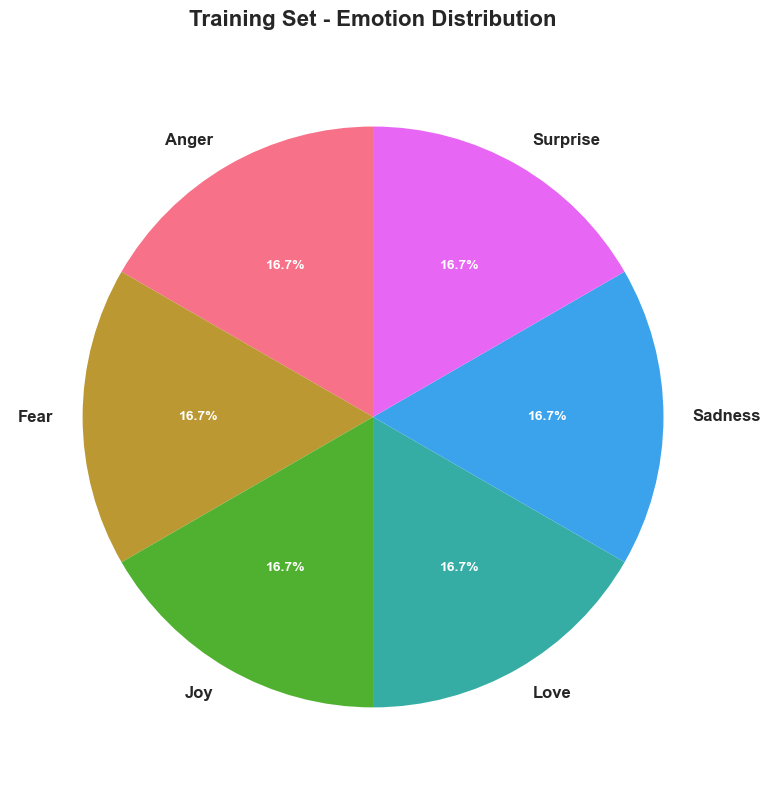

In [110]:
# Visualization 2: Pie Chart - Training Set Distribution
fig, ax = plt.subplots(figsize=(10, 8))
colors = sns.color_palette("husl", 6)
wedges, texts, autotexts = ax.pie(
    train_dist.values,
    labels=train_dist.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
ax.set_title('Training Set - Emotion Distribution', fontsize=16, fontweight='bold', pad=20)
plt.setp(autotexts, size=10, weight="bold", color="white")
plt.tight_layout()
plt.savefig('emotion_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()

In [111]:
# Calculate text lengths
train_df['text_length'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
print(" TEXT LENGTH STATISTICS:")
print(train_df[['text_length', 'word_count']].describe())

 TEXT LENGTH STATISTICS:
        text_length    word_count
count  16000.000000  16000.000000
mean      98.013063     19.386937
std       56.306394     11.065345
min        6.000000      2.000000
25%       54.750000     11.000000
50%       87.000000     17.000000
75%      129.000000     26.000000
max      356.000000     66.000000


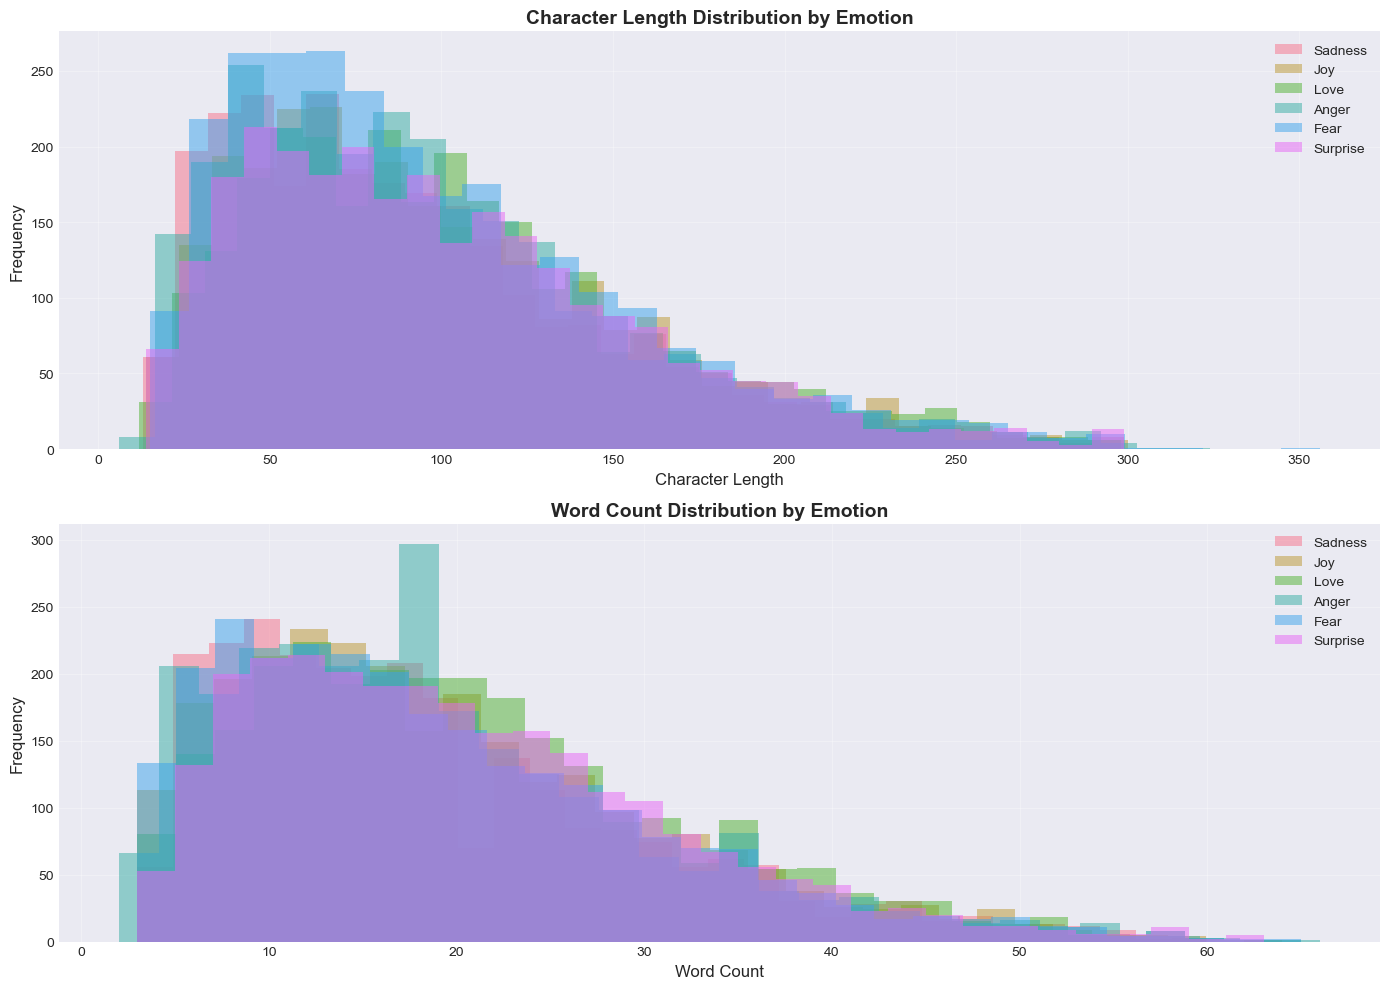

In [112]:
# Visualization 3: Text Length Distribution by Emotion
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Character length distribution
for emotion in emotion_labels.values():
    data = train_df[train_df['emotion_name'] == emotion]['text_length']
    axes[0].hist(data, alpha=0.5, label=emotion, bins=30)

axes[0].set_title('Character Length Distribution by Emotion', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Character Length', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Word count distribution
for emotion in emotion_labels.values():
    data = train_df[train_df['emotion_name'] == emotion]['word_count']
    axes[1].hist(data, alpha=0.5, label=emotion, bins=30)

axes[1].set_title('Word Count Distribution by Emotion', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Word Count', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('text_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

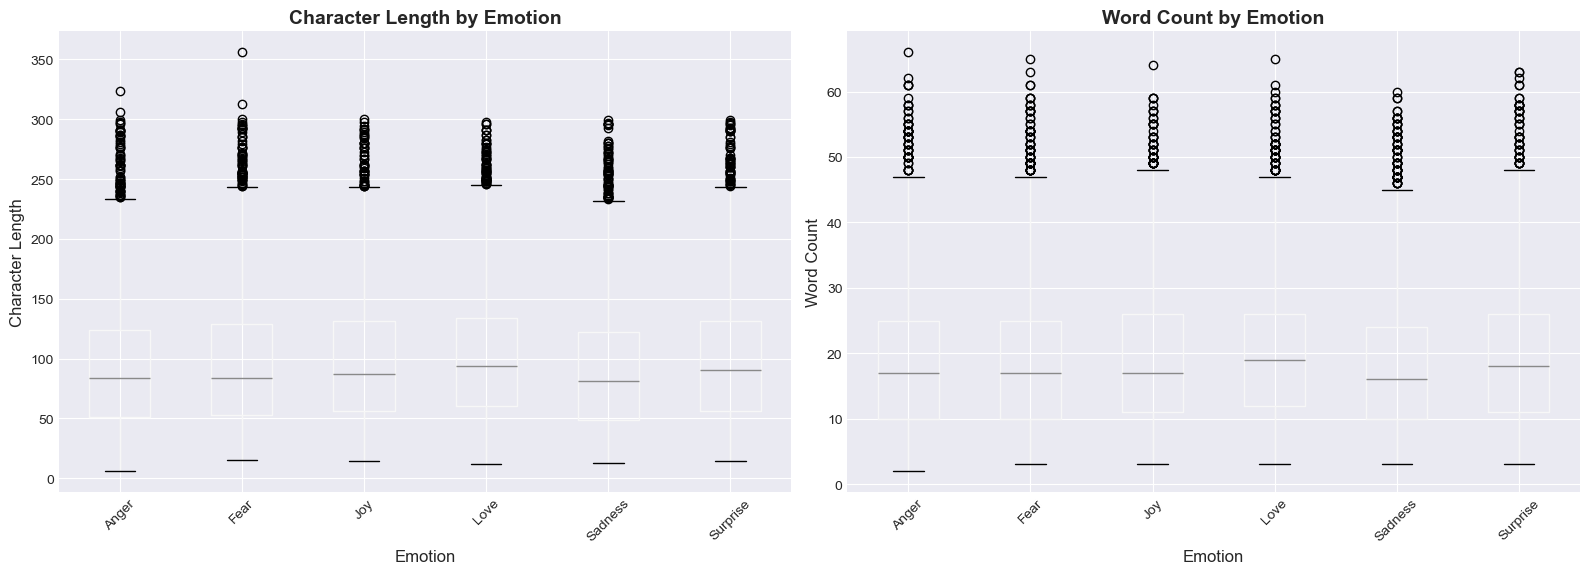

In [113]:
# Visualization 4: Box Plot - Text Length by Emotion
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Character length box plot
train_df.boxplot(column='text_length', by='emotion_name', ax=axes[0])
axes[0].set_title('Character Length by Emotion', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Emotion', fontsize=12)
axes[0].set_ylabel('Character Length', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
plt.sca(axes[0])
plt.xticks(rotation=45)

# Word count box plot
train_df.boxplot(column='word_count', by='emotion_name', ax=axes[1])
axes[1].set_title('Word Count by Emotion', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Emotion', fontsize=12)
axes[1].set_ylabel('Word Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
plt.sca(axes[1])
plt.xticks(rotation=45)

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.savefig('text_length_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [114]:
class TextPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        # Keep negation words as they're important for emotion
        self.stop_words -= {'not', 'no', 'nor', 'neither', 'never', 'none', 'nobody', 'nothing'}
        
    def remove_urls(self, text):
        """Remove URLs from text"""
        return re.sub(r'http\S+|www.\S+', '', text)
    
    def remove_mentions(self, text):
        """Remove @ mentions"""
        return re.sub(r'@\w+', '', text)
    
    def process_hashtags(self, text):
        """Remove # but keep the text"""
        return re.sub(r'#(\w+)', r'\1', text)
    
    def remove_special_chars(self, text):
        """Remove special characters and punctuation"""
        # Keep basic punctuation that might indicate emotion (! ?)
        text = re.sub(r'[^\w\s!?]', ' ', text)
        return text
    
    def to_lowercase(self, text):
        """Convert text to lowercase"""
        return text.lower()
    
    def normalize_whitespace(self, text):
        """Normalize whitespace"""
        return ' '.join(text.split())
    
    def remove_numbers(self, text):
        """Remove numbers"""
        return re.sub(r'\d+', '', text)
    
    def tokenize(self, text):
        """Tokenize text"""
        return word_tokenize(text)
    
    def remove_stopwords(self, tokens):
        """Remove stopwords"""
        return [token for token in tokens if token.lower() not in self.stop_words]
    
    def lemmatize(self, tokens):
        """Lemmatize tokens"""
        return [self.lemmatizer.lemmatize(token) for token in tokens]
    
    def preprocess(self, text, keep_tokens=False):

        # Step 1: Remove URLs
        text = self.remove_urls(text)
        
        # Step 2: Remove mentions
        text = self.remove_mentions(text)
        
        # Step 3: Process hashtags
        text = self.process_hashtags(text)
        
        # Step 4: Convert to lowercase
        text = self.to_lowercase(text)
        
        # Step 5: Remove special characters
        text = self.remove_special_chars(text)
        
        # Step 6: Remove numbers
        text = self.remove_numbers(text)
        
        # Step 7: Normalize whitespace
        text = self.normalize_whitespace(text)
        
        # Step 8: Tokenization
        tokens = self.tokenize(text)
        
        # Step 9: Remove stopwords
        tokens = self.remove_stopwords(tokens)
        
        # Step 10: Lemmatization
        tokens = self.lemmatize(tokens)
        
        # Remove empty tokens
        tokens = [t for t in tokens if len(t) > 1]
        
        if keep_tokens:
            return tokens
        else:
            return ' '.join(tokens)

# Initialize preprocessor
preprocessor = TextPreprocessor()

In [115]:
print("\n Text Preprocessor initialized")
print("\nPreprocessing Steps:")
print("  1. URL Removal")
print("  2. Mention Removal (@username)")
print("  3. Hashtag Processing (keep text, remove #)")
print("  4. Lowercase Conversion")
print("  5. Special Character Removal")
print("  6. Number Removal")
print("  7. Whitespace Normalization")
print("  8. Tokenization")
print("  9. Stopword Removal (keeping negations)")
print(" 10. Lemmatization")


 Text Preprocessor initialized

Preprocessing Steps:
  1. URL Removal
  2. Mention Removal (@username)
  3. Hashtag Processing (keep text, remove #)
  4. Lowercase Conversion
  5. Special Character Removal
  6. Number Removal
  7. Whitespace Normalization
  8. Tokenization
  9. Stopword Removal (keeping negations)
 10. Lemmatization


In [116]:
nltk.download('punkt_tab')
# Select sample tweets for demonstration
sample_texts = train_df.sample(5, random_state=42)['text'].tolist()

print("BEFORE AND AFTER PREPROCESSING:")

preprocessing_examples = []
for i, text in enumerate(sample_texts, 1):
    cleaned = preprocessor.preprocess(text)
    preprocessing_examples.append({
        'Original': text,
        'Cleaned': cleaned
    })
    print(f"\nExample {i}:")
    print(f"Original: {text}")
    print(f"Cleaned:  {cleaned}")

BEFORE AND AFTER PREPROCESSING:

Example 1:
Original: ive reverted back to my original blog title and purpose because honestly ive never strayed from my initial feeling about the delicate balance amp integration of woman and mother
Cleaned:  ive reverted back original blog title purpose honestly ive never strayed initial feeling delicate balance amp integration woman mother

Example 2:
Original: i feel hated i feel like i dont belong and more and more i feel that i want to die
Cleaned:  feel hated feel like dont belong feel want die

Example 3:
Original: i look at the wall ok feeling slightly irate
Cleaned:  look wall ok feeling slightly irate

Example 4:
Original: i can still feel a tender area when i touch it
Cleaned:  still feel tender area touch

Example 5:
Original: i wasnt really feeling up to reviewiing it on ba but i was pretty impressed
Cleaned:  wasnt really feeling reviewiing ba pretty impressed


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


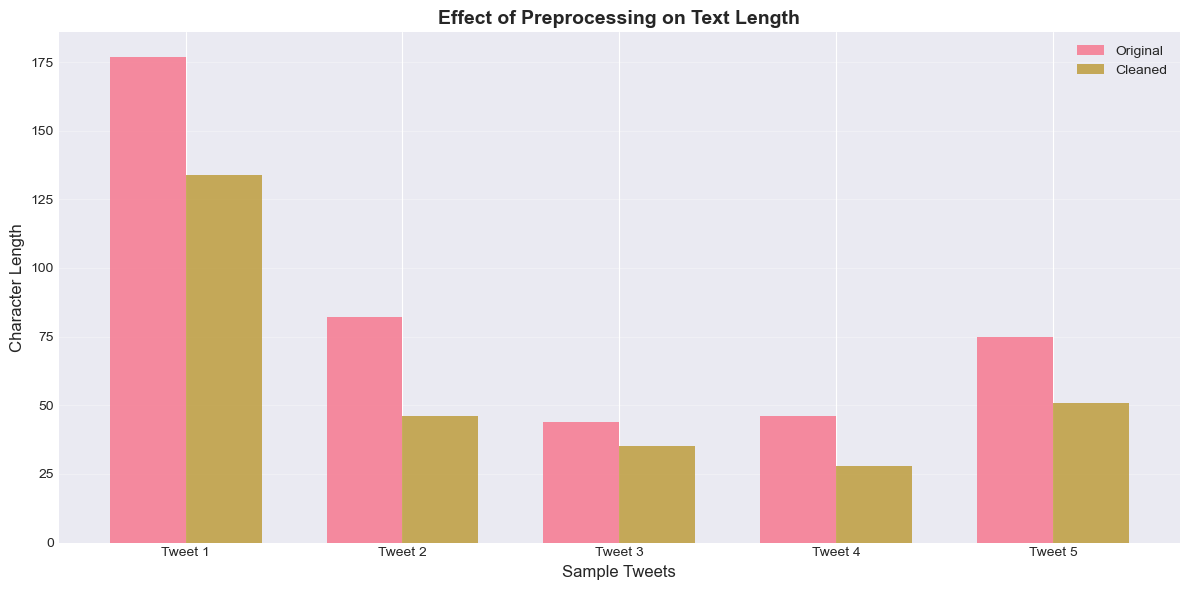

In [117]:
# Create visualization of preprocessing effect
fig, ax = plt.subplots(figsize=(12, 6))

original_lengths = [len(ex['Original']) for ex in preprocessing_examples]
cleaned_lengths = [len(ex['Cleaned']) for ex in preprocessing_examples]

x = np.arange(len(preprocessing_examples))
width = 0.35

bars1 = ax.bar(x - width/2, original_lengths, width, label='Original', alpha=0.8)
bars2 = ax.bar(x + width/2, cleaned_lengths, width, label='Cleaned', alpha=0.8)

ax.set_xlabel('Sample Tweets', fontsize=12)
ax.set_ylabel('Character Length', fontsize=12)
ax.set_title('Effect of Preprocessing on Text Length', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'Tweet {i+1}' for i in range(len(preprocessing_examples))])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('preprocessing_effect.png', dpi=300, bbox_inches='tight')
plt.show()

In [118]:
# Apply preprocessing
print("Processing training set...")
train_df['cleaned_text'] = train_df['text'].apply(lambda x: preprocessor.preprocess(x))

print("Processing validation set...")
val_df['cleaned_text'] = val_df['text'].apply(lambda x: preprocessor.preprocess(x))

print("Processing test set...")
test_df['cleaned_text'] = test_df['text'].apply(lambda x: preprocessor.preprocess(x))

print("Preprocessing completed for all datasets")

Processing training set...
Processing validation set...
Processing test set...
Preprocessing completed for all datasets


In [119]:
# Check for empty texts after preprocessing
empty_train = train_df[train_df['cleaned_text'].str.strip() == ''].shape[0]
empty_val = val_df[val_df['cleaned_text'].str.strip() == ''].shape[0]
empty_test = test_df[test_df['cleaned_text'].str.strip() == ''].shape[0]

print(f"\nEmpty texts after preprocessing:")
print(f"  Training: {empty_train}")
print(f"  Validation: {empty_val}")
print(f"  Test: {empty_test}")


Empty texts after preprocessing:
  Training: 1
  Validation: 0
  Test: 0


In [120]:
if empty_train > 0:
    train_df = train_df[train_df['cleaned_text'].str.strip() != '']
    print(f" Removed {empty_train} empty texts from training set")

 Removed 1 empty texts from training set


In [121]:
# Get all tokens
all_tokens = []
for text in train_df['cleaned_text']:
    all_tokens.extend(text.split())

# Vocabulary statistics
vocab_size = len(set(all_tokens))
total_tokens = len(all_tokens)
avg_tokens_per_doc = total_tokens / len(train_df)

print(f" VOCABULARY STATISTICS:")
print(f"  Total unique words (vocabulary size): {vocab_size:,}")
print(f"  Total tokens: {total_tokens:,}")
print(f"  Average tokens per document: {avg_tokens_per_doc:.2f}")

 VOCABULARY STATISTICS:
  Total unique words (vocabulary size): 13,733
  Total tokens: 152,849
  Average tokens per document: 9.55


In [122]:
# Most common words
word_freq = Counter(all_tokens)
most_common = word_freq.most_common(30)

print(f" TOP 30 MOST FREQUENT WORDS:")
print("-" * 80)
for word, freq in most_common:
    print(f"  {word:.<30} {freq:>6,}")


 TOP 30 MOST FREQUENT WORDS:
--------------------------------------------------------------------------------
  feel.......................... 11,298
  feeling.......................  5,630
  like..........................  2,745
  im............................  2,312
  not...........................  1,895
  time..........................  1,017
  really........................    991
  know..........................    908
  get...........................    851
  little........................    811
  people........................    723
  would.........................    683
  still.........................    683
  one...........................    678
  thing.........................    658
  make..........................    644
  think.........................    615
  day...........................    606
  ive...........................    602
  life..........................    595
  even..........................    594
  want..........................    591
  way.....

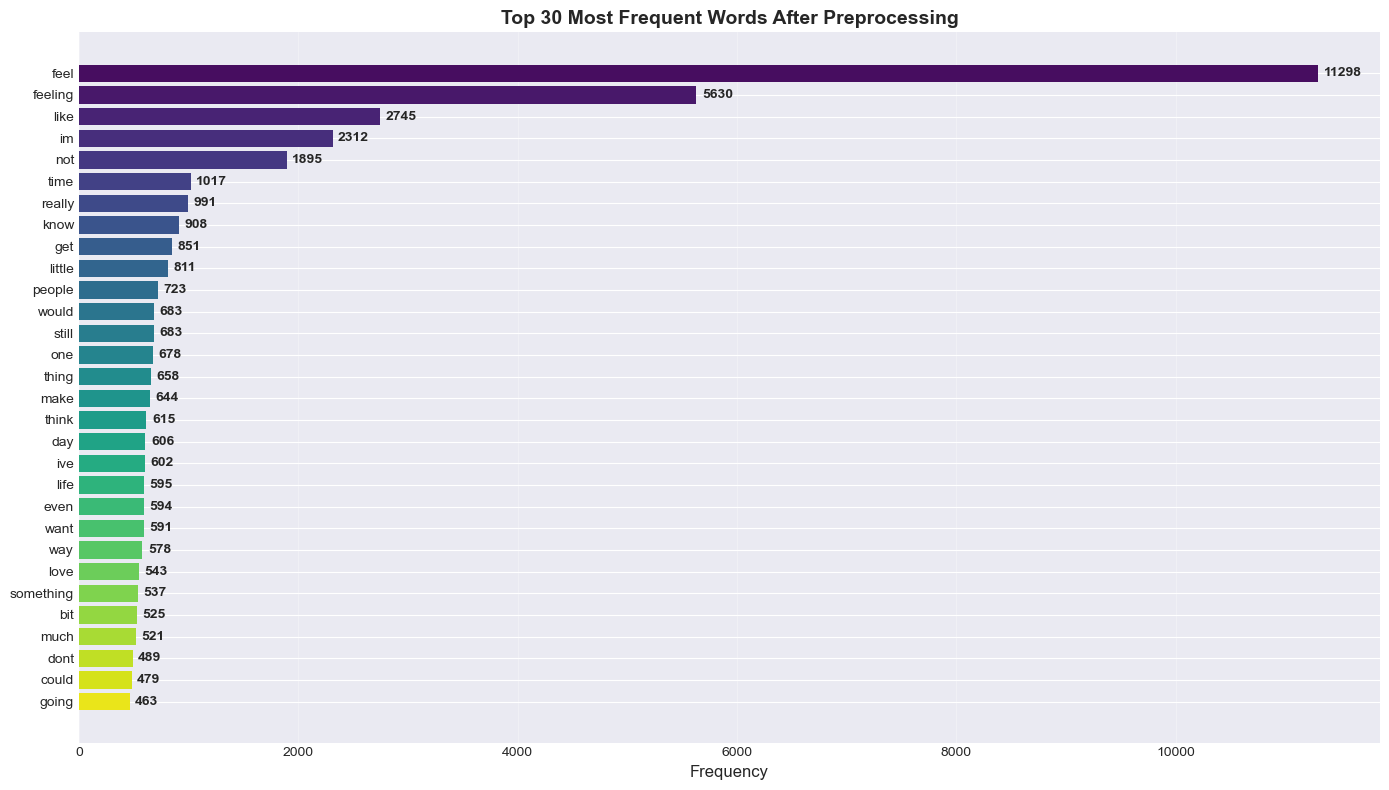

In [123]:
# Visualization: Top words
fig, ax = plt.subplots(figsize=(14, 8))
words, freqs = zip(*most_common)
ax.barh(range(len(words)), freqs, color=sns.color_palette("viridis", len(words)))
ax.set_yticks(range(len(words)))
ax.set_yticklabels(words)
ax.set_xlabel('Frequency', fontsize=12)
ax.set_title('Top 30 Most Frequent Words After Preprocessing', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')

for i, v in enumerate(freqs):
    ax.text(v + 50, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('top_words_frequency.png', dpi=300, bbox_inches='tight')
plt.show()

In [124]:
# Get top words for each emotion
emotion_words = {}
for emotion in emotion_labels.values():
    emotion_texts = train_df[train_df['emotion_name'] == emotion]['cleaned_text']
    emotion_tokens = []
    for text in emotion_texts:
        emotion_tokens.extend(text.split())
    emotion_word_freq = Counter(emotion_tokens)
    emotion_words[emotion] = emotion_word_freq.most_common(10)

print(" TOP 10 WORDS FOR EACH EMOTION:")

for emotion, words in emotion_words.items():
    print(f"\n{emotion}:")
    for word, freq in words:
        print(f"  {word:.<25} {freq:>5,}")

 TOP 10 WORDS FOR EACH EMOTION:

Sadness:
  feel..................... 1,900
  feeling..................   935
  like.....................   491
  im.......................   387
  not......................   305
  time.....................   192
  know.....................   151
  really...................   150
  get......................   150
  little...................   128

Joy:
  feel..................... 1,984
  feeling..................   832
  like.....................   475
  im.......................   350
  not......................   301
  really...................   167
  time.....................   165
  make.....................   142
  know.....................   135
  one......................   130

Love:
  feel..................... 1,952
  feeling..................   873
  like.....................   560
  im.......................   367
  not......................   362
  love.....................   200
  really...................   172
  one......................

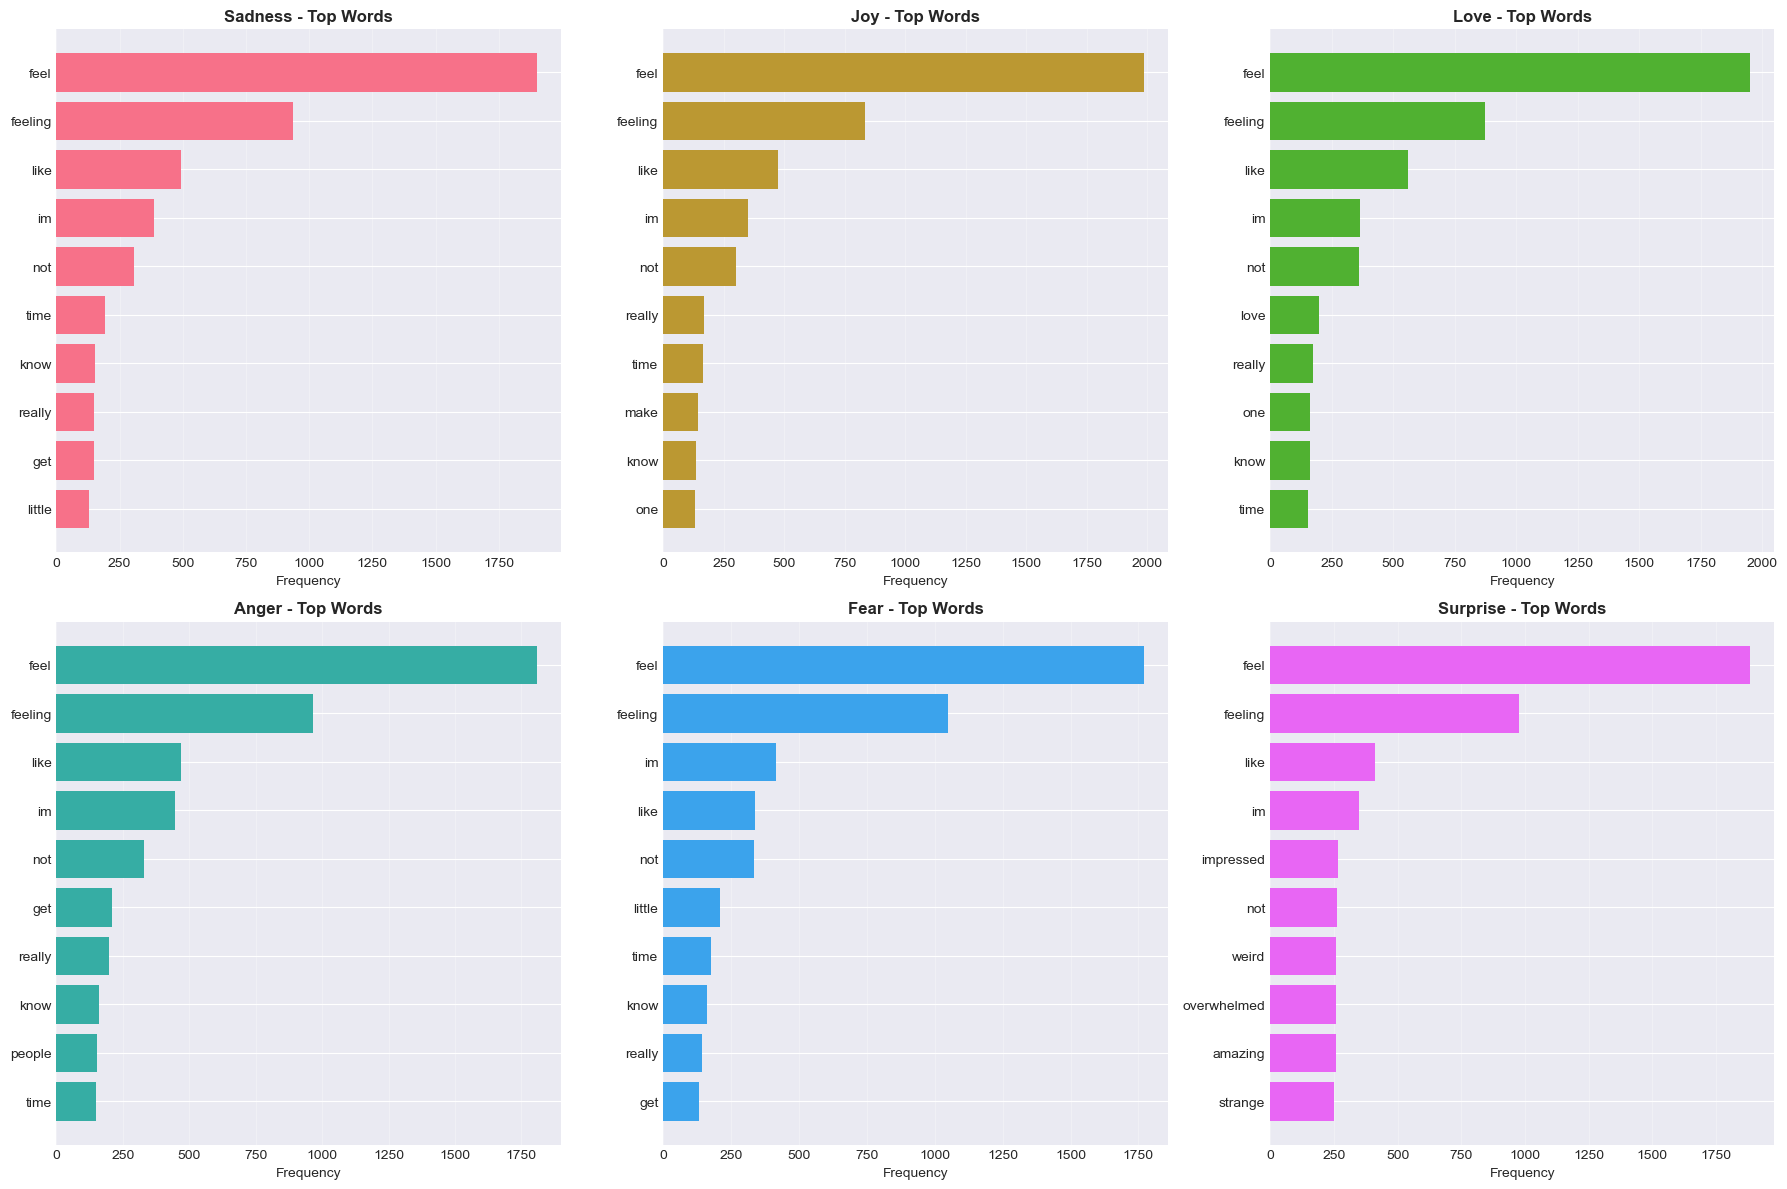

In [125]:
# Visualization: Top words by emotion
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (emotion, words) in enumerate(emotion_words.items()):
    word_list, freq_list = zip(*words)
    axes[idx].barh(range(len(word_list)), freq_list, 
                   color=sns.color_palette("husl", 6)[idx])
    axes[idx].set_yticks(range(len(word_list)))
    axes[idx].set_yticklabels(word_list)
    axes[idx].set_xlabel('Frequency', fontsize=10)
    axes[idx].set_title(f'{emotion} - Top Words', fontsize=12, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('emotion_specific_words.png', dpi=300, bbox_inches='tight')
plt.show()

In [126]:
# Prepare data
X_train = train_df['cleaned_text'].values
y_train = train_df['label'].values

X_val = val_df['cleaned_text'].values
y_val = val_df['label'].values

X_test = test_df['cleaned_text'].values
y_test = test_df['label'].values


In [127]:
print(f"\n DATA SHAPES:")
print(f"  Training: {X_train.shape} samples")
print(f"  Validation: {X_val.shape} samples")
print(f"  Test: {X_test.shape} samples")



 DATA SHAPES:
  Training: (15999,) samples
  Validation: (2000,) samples
  Test: (2000,) samples


In [169]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Unigrams and bigrams
    min_df=2,
    max_df=0.8,
    sublinear_tf=True
)


In [171]:
print("\n Fitting TF-IDF vectorizer on training data...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"\n TF-IDF Vectorization completed")
print(f"  Feature dimensions: {X_train_tfidf.shape[1]}")
print(f"  Training matrix shape: {X_train_tfidf.shape}")
print(f"  Validation matrix shape: {X_val_tfidf.shape}")
print(f"  Test matrix shape: {X_test_tfidf.shape}")


 Fitting TF-IDF vectorizer on training data...

 TF-IDF Vectorization completed
  Feature dimensions: 5000
  Training matrix shape: (15999, 5000)
  Validation matrix shape: (2000, 5000)
  Test matrix shape: (2000, 5000)


In [173]:
# MODEL 1: MULTINOMIAL NAIVE BAYES
print("\n" + "=" * 80)
print("MODEL 1: MULTINOMIAL NAIVE BAYES")
print("=" * 80)
print("\n Training Multinomial Naive Bayes...")
mnb_model = MultinomialNB(alpha=1.0)
mnb_model.fit(X_train_tfidf, y_train)


MODEL 1: MULTINOMIAL NAIVE BAYES

 Training Multinomial Naive Bayes...


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [175]:
# Predictions
mnb_train_pred = mnb_model.predict(X_train_tfidf)
mnb_val_pred = mnb_model.predict(X_val_tfidf)
mnb_test_pred = mnb_model.predict(X_test_tfidf)

In [177]:
# Training accuracy
mnb_train_acc = accuracy_score(y_train, mnb_train_pred)
mnb_val_acc = accuracy_score(y_val, mnb_val_pred)
mnb_test_acc = accuracy_score(y_test, mnb_test_pred)

In [179]:
print(f"\n Naive Bayes Training Completed")
print(f"\n ACCURACY SCORES:")
print(f"  Training Accuracy:   {mnb_train_acc:.4f} ({mnb_train_acc*100:.2f}%)")
print(f"  Validation Accuracy: {mnb_val_acc:.4f} ({mnb_val_acc*100:.2f}%)")
print(f"  Test Accuracy:       {mnb_test_acc:.4f} ({mnb_test_acc*100:.2f}%)")


 Naive Bayes Training Completed

 ACCURACY SCORES:
  Training Accuracy:   0.9414 (94.14%)
  Validation Accuracy: 0.8755 (87.55%)
  Test Accuracy:       0.8840 (88.40%)


In [181]:
# Performance Metrics
def calculate_detailed_metrics(y_true, y_pred, model_name):
    """Calculate comprehensive performance metrics"""
    
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Macro Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro Recall': recall_score(y_true, y_pred, average='macro'),
        'Macro F1-Score': f1_score(y_true, y_pred, average='macro'),
        'Weighted Precision': precision_score(y_true, y_pred, average='weighted'),
        'Weighted Recall': recall_score(y_true, y_pred, average='weighted'),
        'Weighted F1-Score': f1_score(y_true, y_pred, average='weighted'),
    }
    
    return metrics

In [185]:
# Calculate MNB metrics
mnb_metrics = calculate_detailed_metrics(y_test, mnb_test_pred, 'Multinomial Naive Bayes')

print("\n NAIVE BAYES - PERFORMACE METRICS:")
print("-" * 80)
for metric, value in mnb_metrics.items():
    if metric != 'Model':
        print(f"  {metric:.<35} {value:.4f} ({value*100:.2f}%)")


 NAIVE BAYES - PERFORMACE METRICS:
--------------------------------------------------------------------------------
  Accuracy........................... 0.8840 (88.40%)
  Macro Precision.................... 0.8866 (88.66%)
  Macro Recall....................... 0.8841 (88.41%)
  Macro F1-Score..................... 0.8834 (88.34%)
  Weighted Precision................. 0.8866 (88.66%)
  Weighted Recall.................... 0.8840 (88.40%)
  Weighted F1-Score.................. 0.8834 (88.34%)


In [187]:
# Per-class detailed metrics
from sklearn.metrics import precision_recall_fscore_support

mnb_prec, mnb_rec, mnb_f1, mnb_support = precision_recall_fscore_support(
    y_test, mnb_test_pred, average=None, zero_division=0
)

mnb_per_class = pd.DataFrame({
    'Emotion': list(emotion_labels.values()),
    'Precision': mnb_prec,
    'Recall': mnb_rec,
    'F1-Score': mnb_f1,
    'Support': mnb_support
})

print("\n NAIVE BAYES - PER-CLASS METRICS:")
print("-" * 80)
print(mnb_per_class.to_string(index=False))


 NAIVE BAYES - PER-CLASS METRICS:
--------------------------------------------------------------------------------
 Emotion  Precision   Recall  F1-Score  Support
 Sadness   0.935691 0.873874  0.903727      333
     Joy   0.913793 0.793413  0.849359      334
    Love   0.874659 0.963964  0.917143      333
   Anger   0.901538 0.879880  0.890578      333
    Fear   0.862385 0.844311  0.853253      334
Surprise   0.831579 0.948949  0.886396      333


In [193]:
# Classification Report
print(f"\n CLASSIFICATION REPORT (Test Set):")
print("-" * 80)
mnb_report = classification_report(y_test, mnb_test_pred, target_names=list(emotion_labels.values()),digits=4)
print(mnb_report)


 CLASSIFICATION REPORT (Test Set):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Sadness     0.9357    0.8739    0.9037       333
         Joy     0.9138    0.7934    0.8494       334
        Love     0.8747    0.9640    0.9171       333
       Anger     0.9015    0.8799    0.8906       333
        Fear     0.8624    0.8443    0.8533       334
    Surprise     0.8316    0.9489    0.8864       333

    accuracy                         0.8840      2000
   macro avg     0.8866    0.8841    0.8834      2000
weighted avg     0.8866    0.8840    0.8834      2000



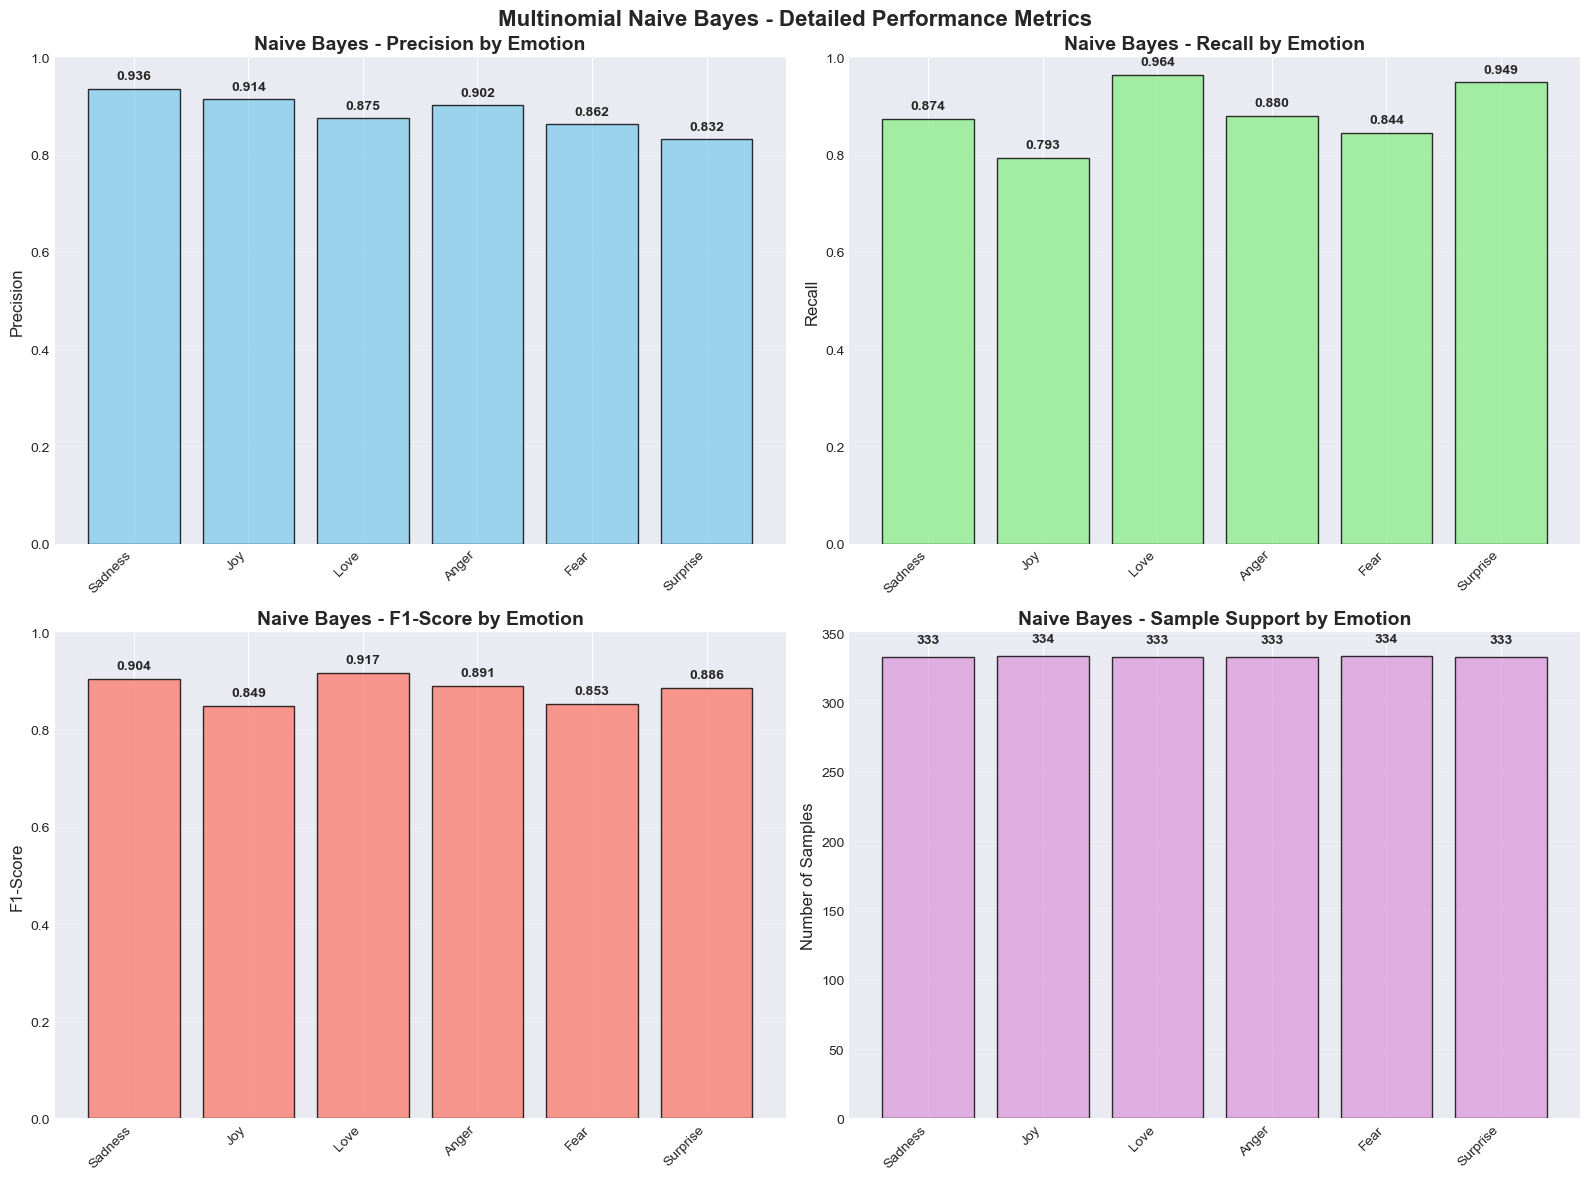

In [195]:
# Visualization: Metrics Bar Chart for MNB
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Precision
axes[0, 0].bar(mnb_per_class['Emotion'], mnb_per_class['Precision'], 
               color='skyblue', alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Naive Bayes - Precision by Emotion', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Precision', fontsize=12)
axes[0, 0].set_ylim([0, 1.0])
axes[0, 0].grid(True, alpha=0.3, axis='y')
plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(mnb_per_class['Precision']):
    axes[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Recall
axes[0, 1].bar(mnb_per_class['Emotion'], mnb_per_class['Recall'], 
               color='lightgreen', alpha=0.8, edgecolor='black')
axes[0, 1].set_title('Naive Bayes - Recall by Emotion', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Recall', fontsize=12)
axes[0, 1].set_ylim([0, 1.0])
axes[0, 1].grid(True, alpha=0.3, axis='y')
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(mnb_per_class['Recall']):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# F1-Score
axes[1, 0].bar(mnb_per_class['Emotion'], mnb_per_class['F1-Score'], 
               color='salmon', alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Naive Bayes - F1-Score by Emotion', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('F1-Score', fontsize=12)
axes[1, 0].set_ylim([0, 1.0])
axes[1, 0].grid(True, alpha=0.3, axis='y')
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(mnb_per_class['F1-Score']):
    axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Support
axes[1, 1].bar(mnb_per_class['Emotion'], mnb_per_class['Support'], 
               color='plum', alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Naive Bayes - Sample Support by Emotion', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Number of Samples', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, axis='y')
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(mnb_per_class['Support']):
    axes[1, 1].text(i, v + 10, f'{int(v)}', ha='center', fontweight='bold')

plt.suptitle('Multinomial Naive Bayes - Detailed Performance Metrics', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('mnb_detailed_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

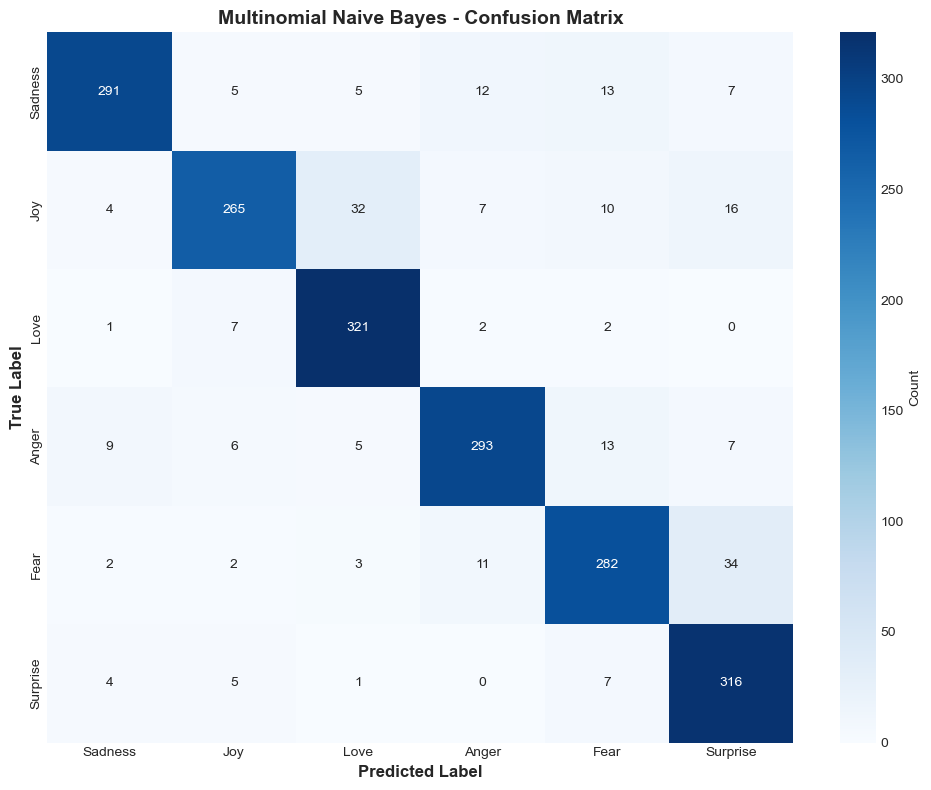

In [197]:
# Confusion Matrix
mnb_cm = confusion_matrix(y_test, mnb_test_pred)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(mnb_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(emotion_labels.values()),
            yticklabels=list(emotion_labels.values()),
            cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Multinomial Naive Bayes - Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('mnb_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()